<a href="https://colab.research.google.com/github/sofienazzabi2/TP1-Deep-Learning/blob/main/Deep_Learning_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

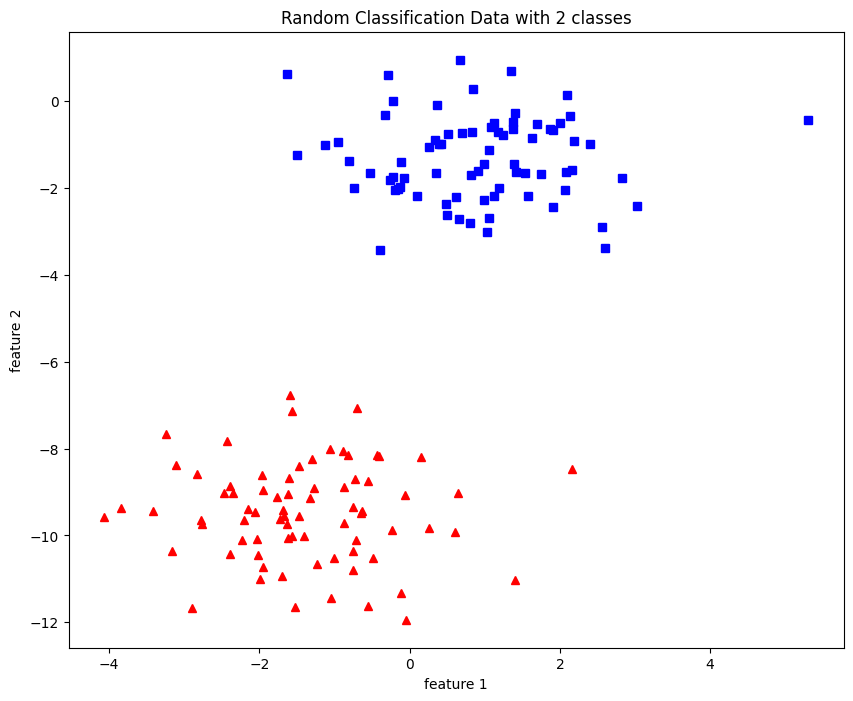

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_blobs (n_samples=150, n_features=2,
 centers=2, cluster_std=1.05,
random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [2]:
def acti_func(z):
    if z>0: return 1
    return 0

In [3]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w=w + lr * (y[idx] - y_hat) * x_i
                # Incrementing by 1.
                n_miss+= 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

In [4]:
def plot_decision_boundary(X,y, w):

    # X --> Inputs
    # w --> parameters

    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[2] / w[1]  # slope
    c = -w[0] / w[1]  # y-intercept
    x2 = m*x1 + c
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    # Plotting
    plt.plot(x1, x2, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

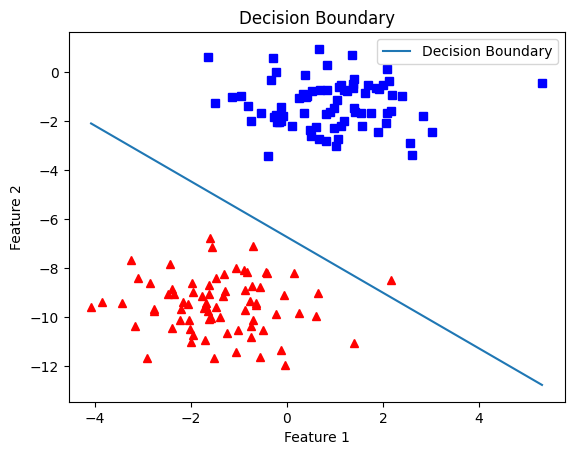

In [5]:
w, n_miss_list=perceptron(X, y, 0.01, 100)

plot_decision_boundary(X,y,w)

In [6]:
#sklearn dataset iris

iris=datasets.load_iris

In [7]:
def acti_func2(z):
    if z<0: return -1
    return 0

In [8]:
def perceptron2(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func2(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w=w + lr * (y[idx] - y_hat) * x_i
                # Incrementing by 1.
                n_miss+= 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

In [9]:
def generate_dataset(coov1, coov2):
    np.random.seed(0)  # For reproducibility
    # Generating the dataset according to the specified distributions
    mean1 = np.array([-1, 0])
    cov1 = np.array([[coov1, 0], [0, coov1]])  # Adjusted covariance matrix
    class_1 = np.random.multivariate_normal(mean1, cov1, 125)

    mean2 = np.array([1, 0])
    cov2 = np.array([[coov2, 0], [0, coov2]])  # Adjusted covariance matrix
    class_2 = np.random.multivariate_normal(mean2, cov2, 125)

    # Combining the two classes
    dataset = np.vstack((class_1, class_2))
    labels = np.hstack((np.full(125, -1), np.full(125, 0)))

    # Shuffling the dataset
    indices = np.arange(dataset.shape[0])
    np.random.shuffle(indices)
    dataset = dataset[indices]
    labels = labels[indices]

    return dataset, labels

In [10]:
# Generate the new dataset with custom standard deviations
X1, y1 = generate_dataset(0.25, 0.25)
w1, n_miss_list1=perceptron2(X1, y1, 0.01, 250)

print(n_miss_list1)
print(w1)

[16, 18, 17, 14, 14, 14, 12, 14, 13, 17, 14, 14, 14, 16, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 14, 13, 15, 16, 14, 14, 16, 14, 14, 13, 17, 14, 16, 14, 14, 12, 14, 14, 14, 14, 12, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 13, 17, 14, 14, 12, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 12, 14, 13, 17, 14, 14, 14, 13, 15, 16, 14, 14, 16, 14, 14, 13, 17, 14, 16, 14, 14, 16, 14, 14, 12, 14, 13, 17, 14, 14, 12, 14, 13, 17, 14, 14, 14, 16, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 12, 14, 13, 17, 14, 14, 14, 13, 15, 16, 14, 14, 16, 14, 14, 13, 17, 14, 16, 14, 14, 16, 14, 14, 12, 14, 13, 17, 14, 14, 12, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 14, 14, 13, 17, 14, 14, 16, 14, 14, 14, 16, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 14, 13, 15, 16, 14, 14, 16, 14, 14, 12, 14, 14, 14, 13, 17, 14, 14, 16, 14, 14, 14, 16, 14, 14, 13, 17, 14, 14, 16, 14, 14, 12, 14, 14, 13, 15, 16, 14, 14, 12, 14, 14, 14, 14, 12, 14, 13, 17, 14, 14, 12, 14, 14, 13]

In [11]:
def plot_decision_boundary2(X, y, w):
    w0, w1, w2 = w[0], w[1], w[2]
    m = -w1 / w2
    c = -w0 / w2
    x1_boundary = [min(X[:,0]), max(X[:,0])]
    x2_boundary = m * np.array(x1_boundary) + c

    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], color='red', label='Class -1')
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0')

    plt.xlim(min(X[:,0]),max(X[:,0]))
    plt.ylim(min(X[:,1]),max(X[:,1]))
    plt.plot(x1_boundary, x2_boundary, 'k-', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

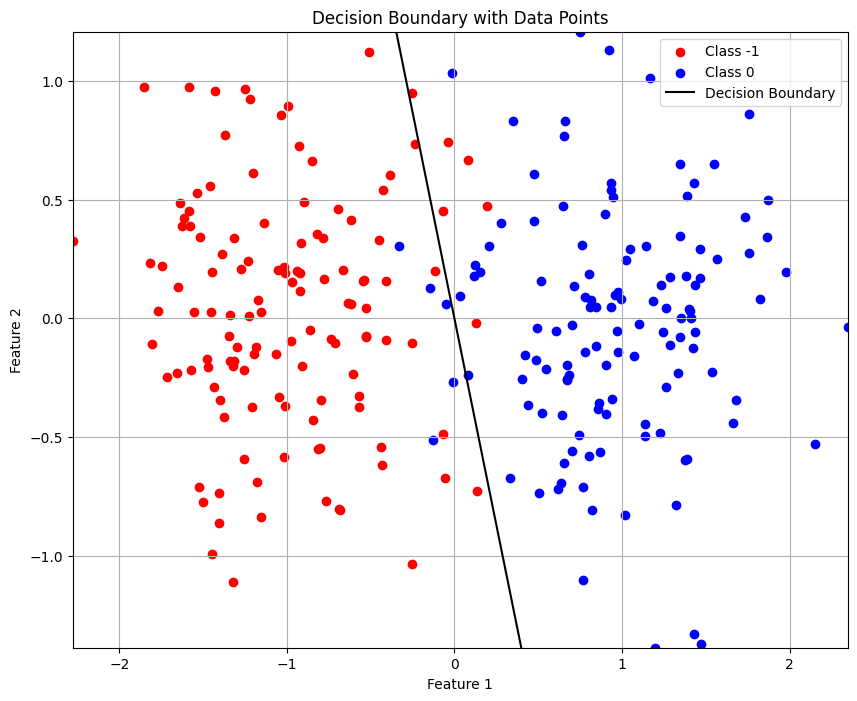

In [12]:
plot_decision_boundary2(X1,y1,w1)

In [13]:
# Generate the new dataset with custom standard deviations
X2, y2 = generate_dataset(0.75, 0.75)
w2, n_miss_list2=perceptron2(X2, y2, 0.01, 250)

print(n_miss_list2)
print(w2)

[55, 53, 58, 57, 50, 59, 57, 54, 54, 50, 59, 57, 52, 52, 56, 50, 53, 51, 56, 53, 58, 58, 51, 53, 57, 59, 60, 57, 53, 58, 53, 58, 52, 60, 56, 59, 56, 60, 57, 53, 58, 53, 54, 56, 51, 51, 59, 58, 56, 55, 57, 53, 59, 57, 50, 59, 57, 52, 52, 56, 50, 59, 57, 52, 52, 52, 54, 56, 50, 50, 53, 51, 56, 52, 52, 54, 50, 54, 56, 52, 56, 55, 53, 53, 57, 57, 55, 52, 54, 55, 61, 52, 52, 57, 57, 52, 55, 57, 52, 54, 50, 59, 57, 54, 54, 50, 59, 57, 52, 52, 56, 50, 53, 51, 59, 57, 54, 54, 50, 59, 57, 54, 54, 50, 59, 57, 52, 52, 52, 54, 56, 50, 50, 53, 51, 56, 52, 52, 54, 56, 50, 50, 53, 51, 56, 52, 60, 56, 59, 53, 52, 57, 57, 50, 53, 51, 56, 52, 52, 54, 56, 50, 50, 53, 51, 56, 52, 52, 54, 50, 54, 56, 51, 58, 53, 52, 52, 57, 58, 53, 56, 59, 56, 58, 58, 51, 56, 52, 60, 54, 57, 57, 50, 59, 57, 52, 52, 56, 50, 53, 51, 50, 59, 60, 57, 57, 57, 50, 59, 57, 54, 54, 50, 59, 57, 52, 52, 56, 50, 53, 51, 50, 59, 60, 57, 57, 57, 50, 59, 57, 54, 54, 50, 59, 57, 52, 52, 56, 50, 53, 51, 50, 59, 60, 53, 58, 50, 52, 52, 54]

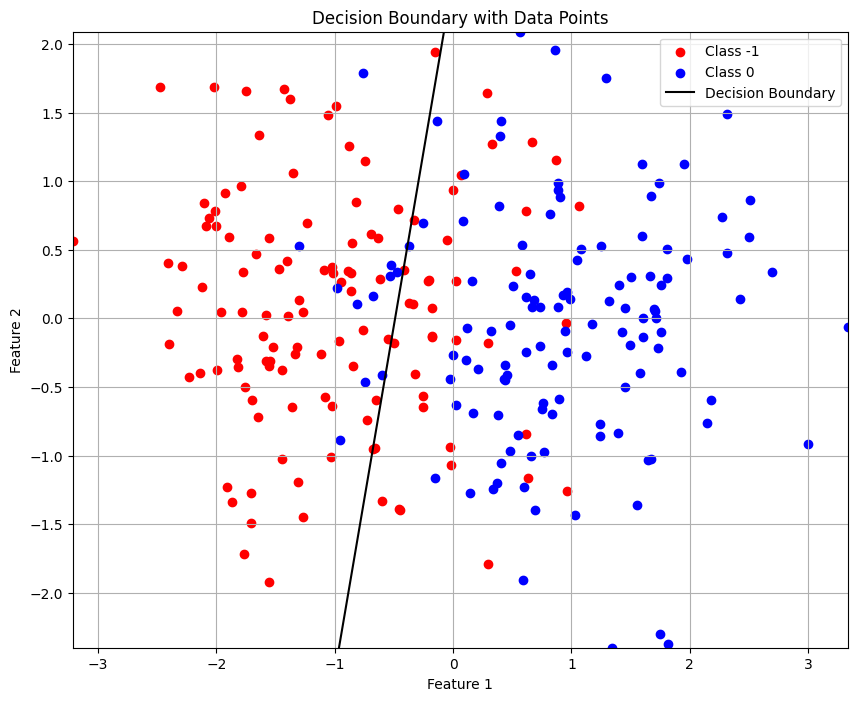

In [14]:
plot_decision_boundary2(X2,y2,w2)